In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("diabetes.csv")
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.info() #understand data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.shape

(768, 9)

In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:

  data[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=data[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)

In [7]:
for col in ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI']:
  data[col]=data[col].fillna(data[col].mean())

In [8]:
data.isna().sum() #missing value

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
#split x ,y
X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(X,y,test_size=0.3)


In [10]:
train_x.shape

(537, 8)

In [11]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(train_x)    
x_test= st_x.transform(test_x)    

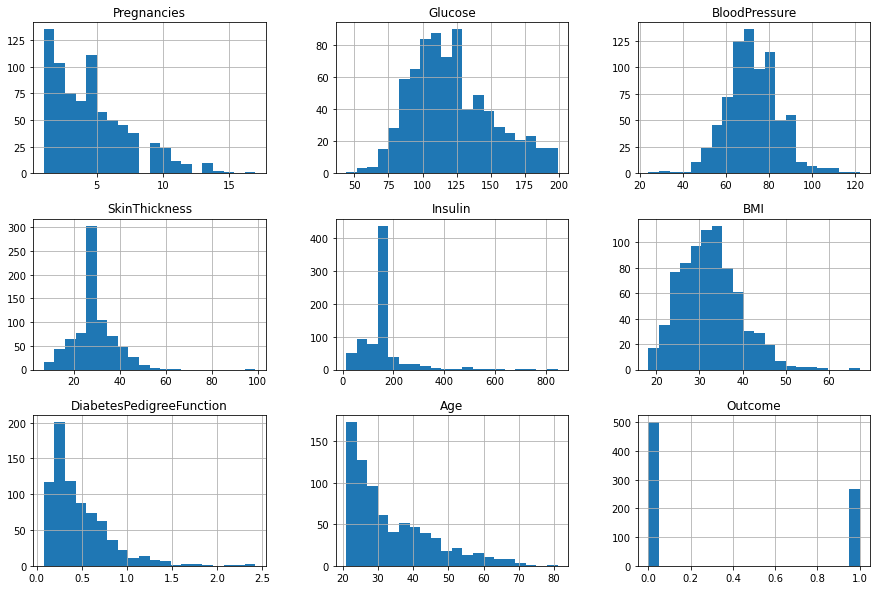

In [12]:
data.hist(bins=20,figsize=(15,10))
plt.show()


<AxesSubplot:xlabel='Outcome', ylabel='count'>

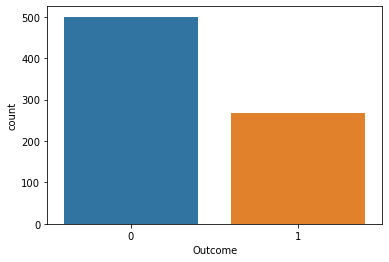

In [13]:
sns.countplot(x='Outcome',data=data)

<AxesSubplot:>

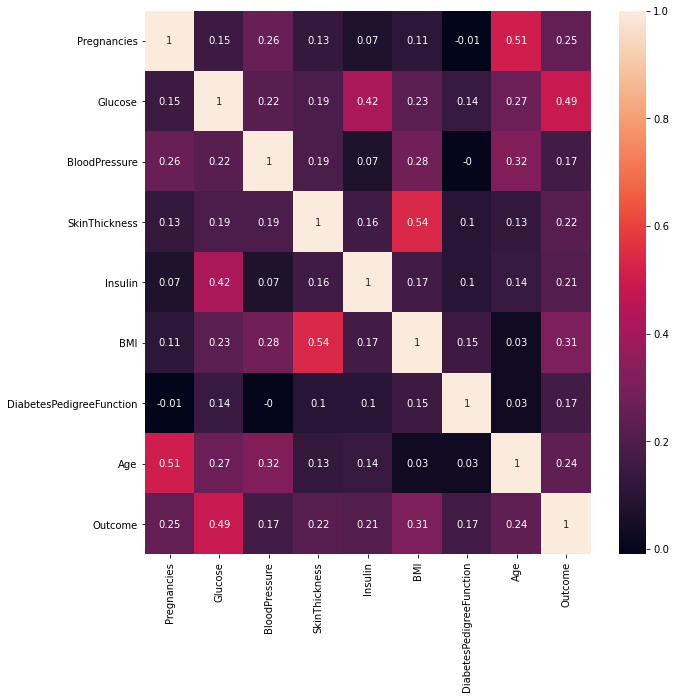

In [14]:
plt.figure(figsize=(10,10))
correlation_matrix=data.corr().round(2)
sns.heatmap(correlation_matrix,annot=True)

In [15]:
#feature selection
selected_columns=["Glucose","Insulin","BMI","Age","Pregnancies"]
final_data=pd.DataFrame(data,columns=selected_columns)
final_data['target']=data.iloc[:,-1]
final_data.head()







,Glucose,Insulin,BMI,Age,Pregnancies,target
0,148.0,155.548223,33.6,50,6.000000,1
1,85.0,155.548223,26.6,31,1.000000,0
2,183.0,155.548223,23.3,32,8.000000,1
3,89.0,94.000000,28.1,21,1.000000,0
4,137.0,168.000000,43.1,33,4.494673,1


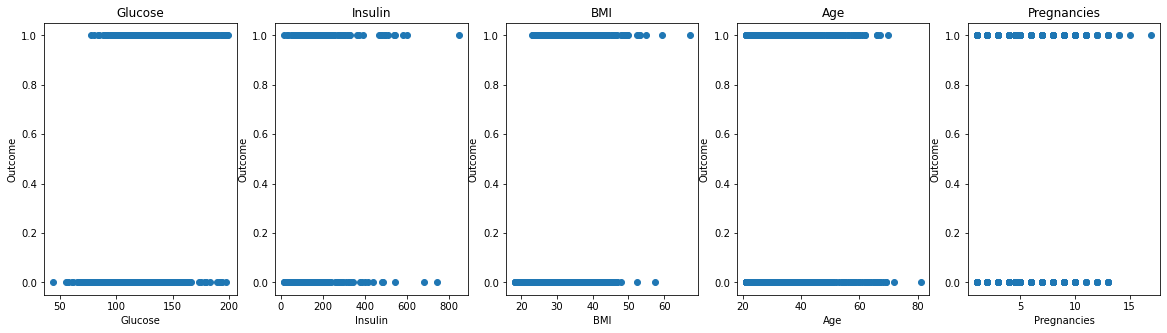

In [16]:
plt.figure(figsize=(20,5))
features=["Glucose","Insulin","BMI","Age","Pregnancies"]

target=data['Outcome']
for i, col in enumerate(features):
  plt.subplot(1,len(features),i+1)
  x=data[col]
  y=target
  plt.scatter(x,y,marker='o')
  plt.title(col)
  plt.xlabel(col)
  plt.ylabel("Outcome")

In [45]:
#train&test finaldata
X=final_data.iloc[:,:-1].values
Y=final_data.iloc[:,-1].values
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=0.3)


In [46]:
train_X.shape

(537, 5)

In [47]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(train_X,train_Y)

LogisticRegression()

In [48]:
y_pred=model.predict(test_X)

In [49]:
from sklearn.metrics import classification_report,accuracy_score,recall_score,precision_score,f1_score
print("Accuracy : ", round(accuracy_score(y_pred,test_Y)*100,2),'%')
print("Recall : ", round(recall_score(y_pred,test_Y)*100,2),'%')
print("Precision : ", round(precision_score(y_pred,test_Y)*100,2),'%')
print("F1 score : ", round(f1_score(y_pred,test_Y)*100,2),'%')

Accuracy :  80.95 %
Recall :  75.41 %
Precision :  61.33 %
F1 score :  67.65 %


In [ ]:
#